In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
from scipy.optimize import curve_fit
import importlib
from cycler import cycler
from matplotlib.ticker import MultipleLocator
from pathlib import Path
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\kearb\\Documents\\GitHub\\Python Projects\\AdvLabs\\Lab 3\\utils.py'>

In [3]:
# ------------------------------------------------------------------
# 1 · load the background once
# ------------------------------------------------------------------
bkg = utils.load_scan("Data/2_bkg.txt")          # rows = Mass values

# ------------------------------------------------------------------
# 2 · loop through every Kr file, subtract & clip
# ------------------------------------------------------------------
file_paths = Path("Data").glob("Xe-*.txt")  # or use your explicit list

data_dict = {}

for path in file_paths:
    df = utils.load_scan(path)

    # align on Mass and subtract               (automatic index alignment)
    df["Pressure (torr)"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

    # store in the dict under a short key, e.g. "Kr-1"
    data_dict[path.stem] = df.reset_index()   # back to columns if you prefer

# ------------------------------------------------------------------
# 3 · check one entry
# ------------------------------------------------------------------
print(data_dict["Xe-1"].head())


   Mass  Pressure (uncorrected)  Pressure (torr)
0  55.0            1.010000e-08     4.840000e-09
1  55.1            1.060000e-08     4.810000e-09
2  55.2            8.840000e-09     3.580000e-09
3  55.3            3.950000e-09     1.040000e-09
4  55.4            1.470000e-09     9.000000e-11


In [4]:
pressures = [
    '23 mbar', '4.0 mbar', '7.13e-1 mbar', '3.24E-1 mbar', '1.44E-1 mbar',
    '7.44E-2 mbar', '4.50E-2 mbar', '3.50E-2 mbar', '2.85E-2 mbar'
]

In [5]:
for key, df in data_dict.items():
    df.drop(columns=['Pressure (uncorrected)'], inplace=True)

In [6]:
max_value = 0
for key, data in data_dict.items():
    temp_max = data['Pressure (torr)'].max()
    if temp_max > max_value:
        max_value = temp_max

In [7]:
for key, data in data_dict.items():
    intensity = data['Pressure (torr)'] / max_value * 100  # Normalize to percentage
    data_dict[key]['Intensity'] = intensity


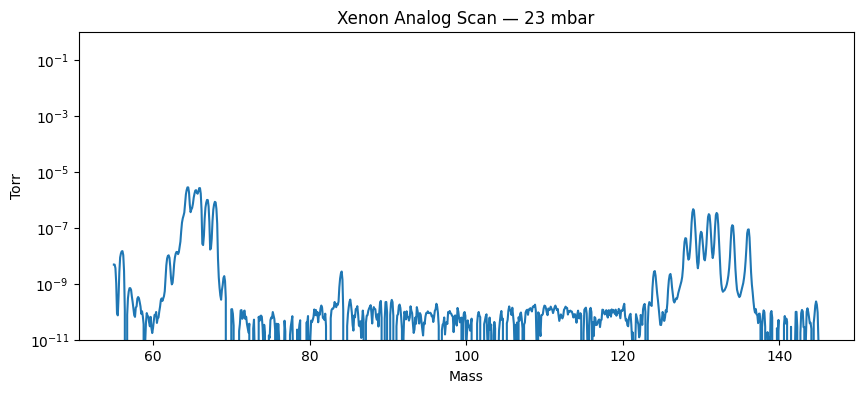

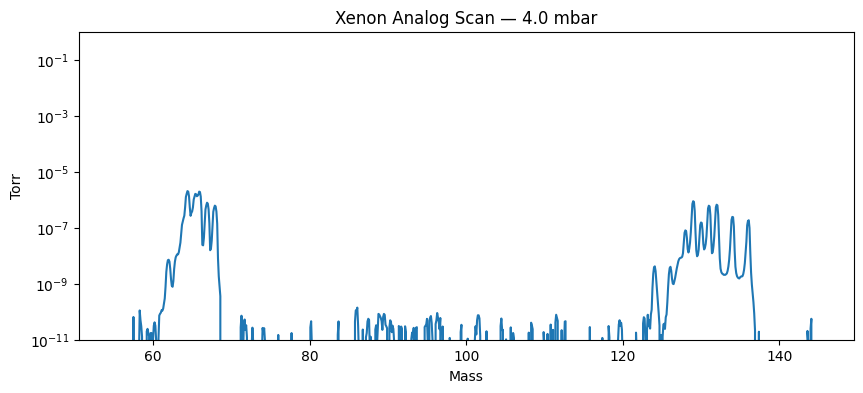

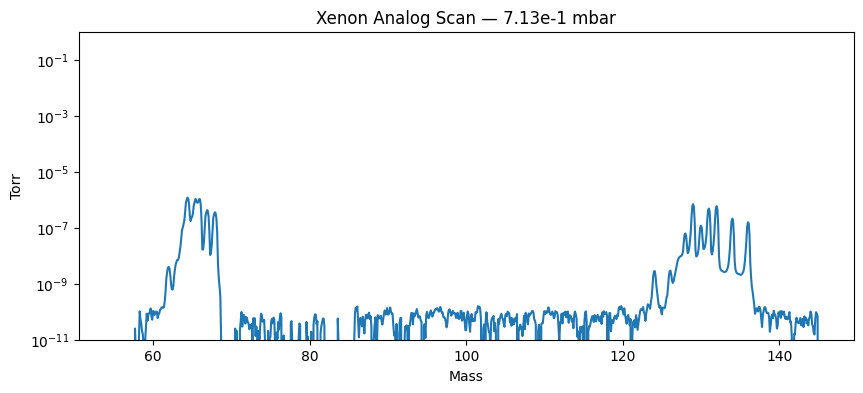

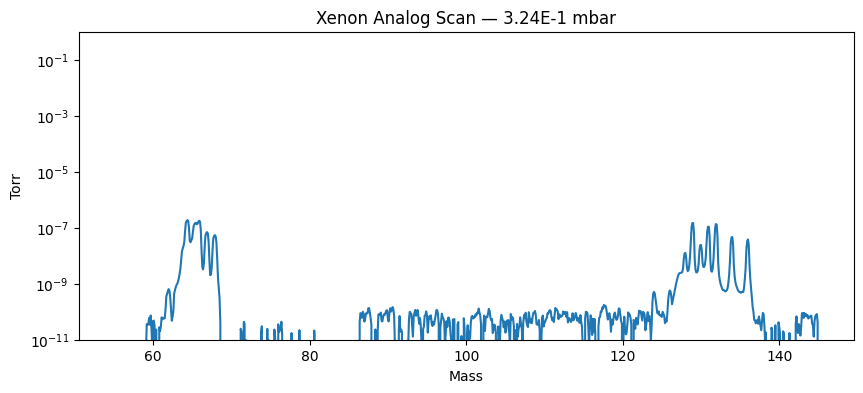

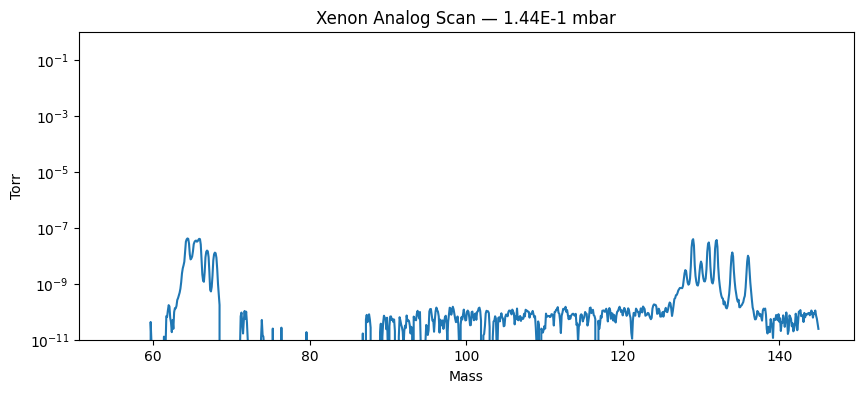

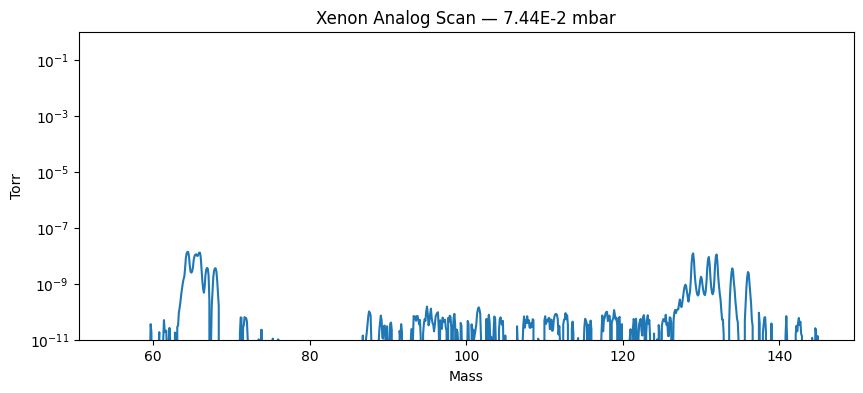

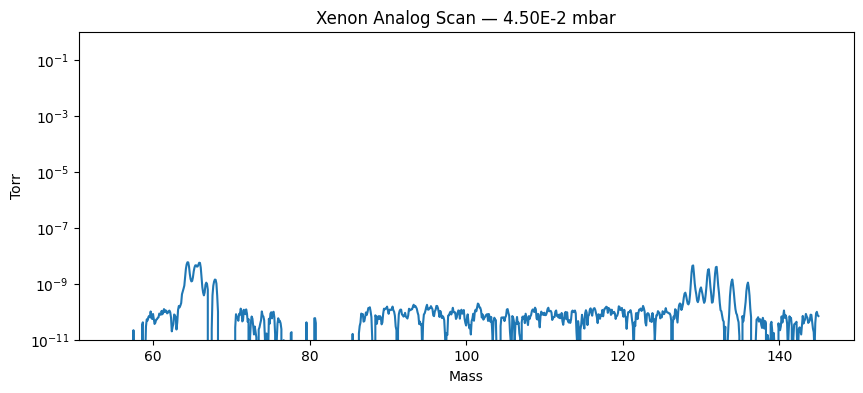

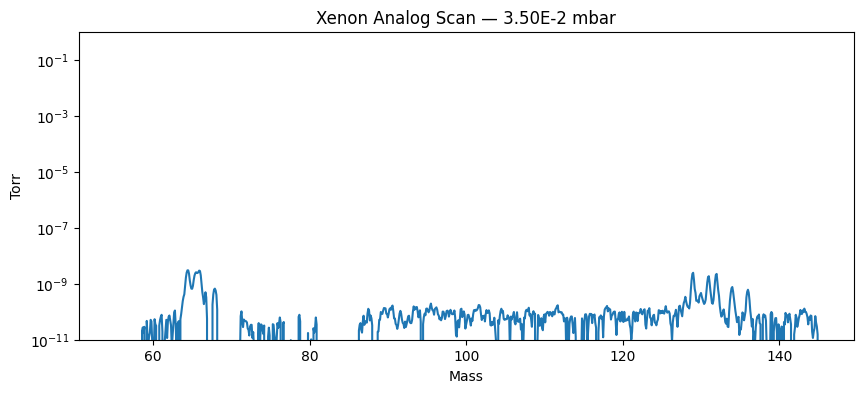

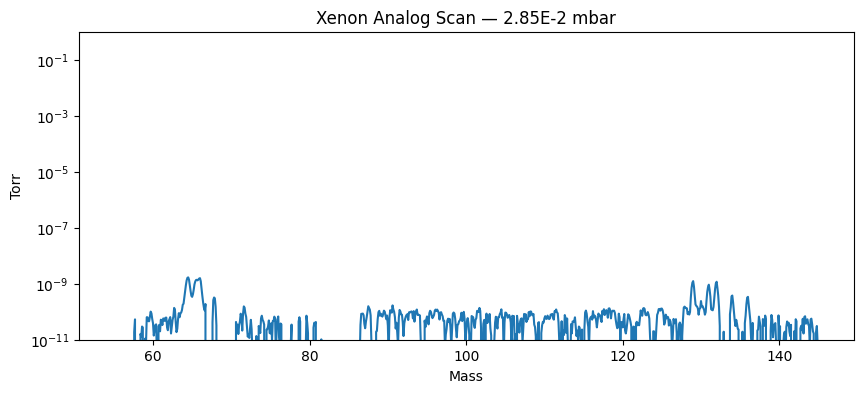

In [8]:
for idx, (key, data) in enumerate(data_dict.items()):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_ylim(bottom=1e-11)
    ax.set_yscale('log')
    ax.plot(data['Mass'], data['Pressure (torr)'])

    # --- insert the pressure in the title ---
    this_p = pressures[idx]            # take the matching pressure
    ax.set(
        xlabel='Mass',
        ylabel='Torr',
        title=f'Xenon Analog Scan — {this_p}'   # scientific format
    )

    plt.show()


In [9]:
peaks_xenon, peaks_mass_xenon = utils.find_peaks(data_dict['Xe-1'], cutoff=5, interval=1.5)
xenon_peaks_df = pd.DataFrame({
    'Mass': peaks_mass_xenon,
    'Intensity': peaks_xenon
})
print(xenon_peaks_df)

    Mass   Intensity
0   64.4  100.000000
1   64.5   99.637387
2   66.0   94.199025
3   66.9   35.724914
4   67.9   30.427259
5  129.0   16.631172
6  131.0   11.050333
7  132.0   12.212689


In [10]:
tableau9 = [
     "#3B71AA", "#F28E2B", "#020101", "#2EBBAF", "#2C8021",
    "#EDC948", "#FF1FBF", "#F3152B", "#CA6023"
]
major_step = 10
minor_step = 5

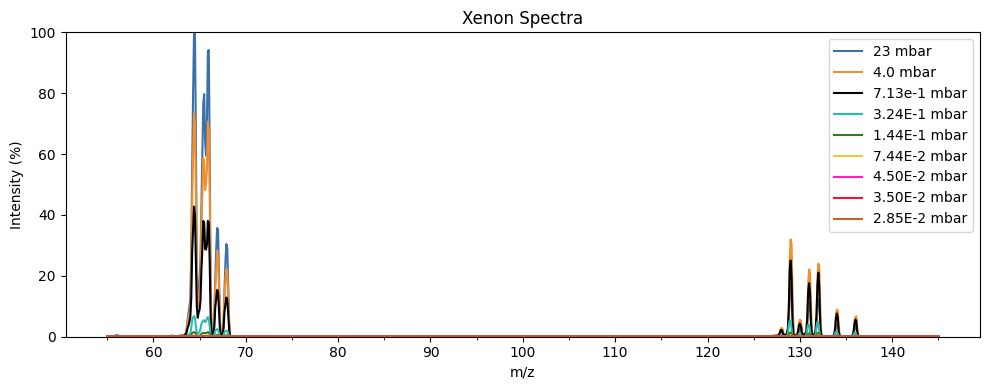

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.set_prop_cycle(cycler(color=tableau9))
ax.set_ylim(0, 100)
ax.xaxis.set_major_locator(MultipleLocator(major_step))
ax.xaxis.set_minor_locator(MultipleLocator(minor_step))
for key, data in data_dict.items():
    ax.plot(data['Mass'], data['Intensity'])
    ax.set(xlabel='m/z', ylabel='Intensity (%)', title='Xenon Spectra')
plt.tight_layout()
plt.legend(pressures, loc='upper right')
plt.show()

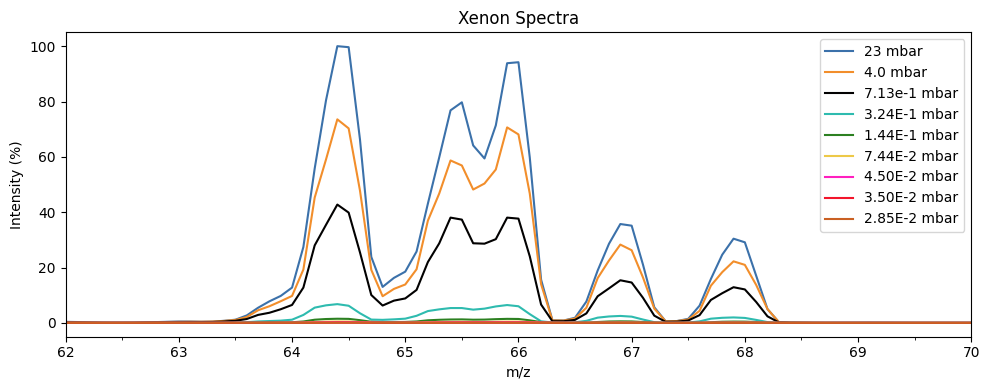

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.set_prop_cycle(cycler(color=tableau9))
ax.set_xlim(62, 70)
ax.xaxis.set_major_locator(MultipleLocator(minor_step/5))
ax.xaxis.set_minor_locator(MultipleLocator(minor_step/10))
for key, data in data_dict.items():
    ax.plot(data['Mass'], data['Intensity'])
    ax.set(xlabel='m/z', ylabel='Intensity (%)', title='Xenon Spectra')
plt.tight_layout()
plt.legend(pressures, loc='upper right')
plt.show()

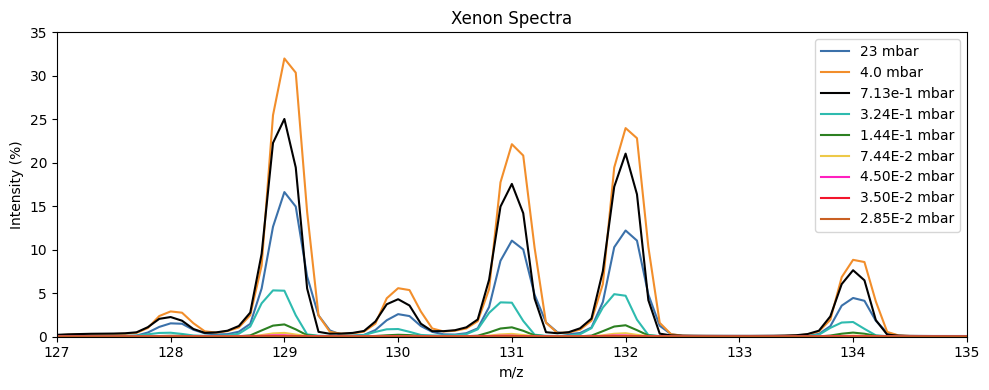

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_prop_cycle(cycler(color=tableau9))
ax.set_xlim(127, 135)
ax.set_ylim(0, 35)
ax.xaxis.set_major_locator(MultipleLocator(minor_step/5))
#ax.xaxis.set_minor_locator(MultipleLocator(minor_step/5))
for key, data in data_dict.items():
    ax.plot(data['Mass'], data['Intensity'])
    ax.set(xlabel='m/z', ylabel='Intensity (%)', title='Xenon Spectra')
plt.tight_layout()
plt.legend(pressures, loc='upper right')
plt.show()

In [14]:
# ------------------------------------------------------------------
# 1 · load the background once
# ------------------------------------------------------------------
bkg = load_scan("Data/1_bkg.txt")          # rows = Mass values

# ------------------------------------------------------------------
# 2 · loop through every Kr file, subtract & clip
# ------------------------------------------------------------------
file_paths = Path("Data").glob("Kr-*.txt")  # or use your explicit list

data_dict_2 = {}

for path in file_paths:
    df = load_scan(path)

    # align on Mass and subtract               (automatic index alignment)
    df["Pressure"] = (df["Pressure (uncorrected)"] - bkg["Pressure (uncorrected)"]).clip(lower=0)

    # store in the dict under a short key, e.g. "Kr-1"
    data_dict_2[path.stem] = df.reset_index()   # back to columns if you prefer

# ------------------------------------------------------------------
# 3 · check one entry
# ------------------------------------------------------------------



max_value = 0
for key, data in data_dict_2.items():
    temp_max = data['Pressure'].max()
    if temp_max > max_value:
        max_value = temp_max

for key, data in data_dict_2.items():
    intensity = data['Pressure'] / max_value * 100  # Normalize to percentage
    data_dict_2[key]['Intensity'] = intensity

#print(data_dict_2["Kr-1"].head(30))


NameError: name 'load_scan' is not defined

In [ ]:
pressures = [
    23, 4.0, 7.13e-1, 3.24e-1, 1.44e-1,
    7.44e-2, 4.50e-2, 3.50e-2, 2.85e-2
]

pressures2 = [
    25, 4.5, 1.24 , 1.18, 1.05, 
    4.45e-1 , 1.97e-1 , 1.53e-1, 7.90e-2 , 3.85e-2 
]

In [ ]:
pressure_intensity = {                        # ←  a **set** of tuples
    (p, d['Intensity'].max())                 #    (pressure, max-I)
    for (p, (_, d)) in zip(pressures, data_dict.items())
}

In [ ]:
pressure_intensity_2 = {                        # ←  a **set** of tuples
    (p, d['Intensity'].max())                 #    (pressure, max-I)
    for (p, (_, d)) in zip(pressures2, data_dict_2.items())
}

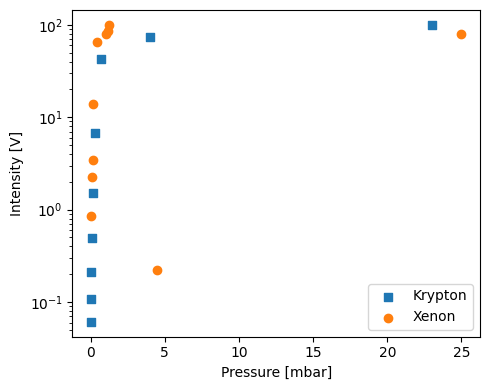

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.scatter(*zip(*pressure_intensity),   marker='s', label='Krypton')
ax.scatter(*zip(*pressure_intensity_2), marker='o', label='Xenon')

ax.set_yscale('log')
ax.set_xlabel('Pressure [mbar]')
ax.set_ylabel('Intensity [V]')
#ax.grid(True, which='both', ls='--', lw=0.5)
ax.legend()
plt.tight_layout()
plt.show()

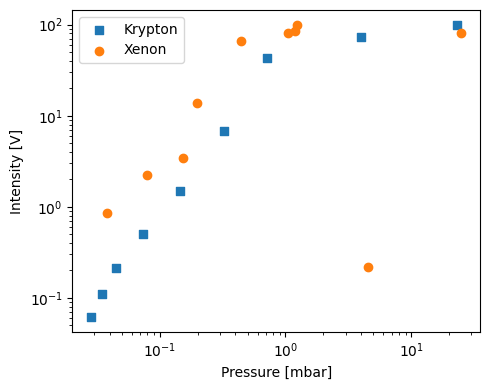

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.scatter(*zip(*pressure_intensity),   marker='s', label='Krypton')
ax.scatter(*zip(*pressure_intensity_2), marker='o', label='Xenon')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Pressure [mbar]')
ax.set_ylabel('Intensity [V]')
#ax.grid(True, which='both', ls='--', lw=0.5)
ax.legend()
plt.tight_layout()
plt.show()